In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Student%20Behavior/Student_Behaviour.csv")
df.head()

,"Have you completed any certification courses, or are you currently enrolled in any?",Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,possibility of choosing their career based on their degree :,social medai & video games spending Time,Travelling Time,Stress Level,Financial Status,Are you doing a part-time job right now?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [3]:
df.shape

(235, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   Have you completed any certification courses, or are you currently enrolled in any?  235 non-null    object 
 1   Gender                                                                               235 non-null    object 
 2   Department                                                                           235 non-null    object 
 3   Height(CM)                                                                           235 non-null    float64
 4   Weight(KG)                                                                           235 non-null    float64
 5   10th Mark                                                                            235 non

In [5]:
df.isna().sum()

Have you completed any certification courses, or are you currently enrolled in any?    0
Gender                                                                                 0
Department                                                                             0
Height(CM)                                                                             0
Weight(KG)                                                                             0
10th Mark                                                                              0
12th Mark                                                                              0
college mark                                                                           0
hobbies                                                                                0
daily studing time                                                                     0
prefer to study in                                                                     0
salary expectation   

In [6]:
new_col_name = {'Have you completed any certification courses, or are you currently enrolled in any?': 'certificate_or_enrolled',
               'Do you like your degree?': 'like degree',
                'possibility of choosing  their career based on their degree : ': 'career based on degree', 
                'social medai & video games spending Time': 'SM & VG time', 
                'Are you doing a part-time job right now?': 'part-time job'}
df = df.rename(columns=new_col_name)
df.columns

Index(['certificate_or_enrolled', 'Gender', 'Department', 'Height(CM)',
       'Weight(KG)', '10th Mark', '12th Mark', 'college mark', 'hobbies',
       'daily studing time', 'prefer to study in', 'salary expectation',
       'like degree', 'career based on degree', 'SM & VG time',
       'Travelling Time ', 'Stress Level ', 'Financial Status',
       'part-time job'],
      dtype='object')

In [7]:
df.head()

,certificate_or_enrolled,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,like degree,career based on degree,SM & VG time,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [8]:
df['career based on degree'].unique() 

array(['50%', '75%', '25%', '100%', '0%'], dtype=object)

In [9]:
df['career based on degree'].value_counts() 

75%     114
50%      61
100%     44
25%      14
0%        2
Name: career based on degree, dtype: int64

In [10]:
df['rating(career based on degree)'] = df['career based on degree'].map({'0%':1, '25%':2,'50%':3,'75%':4,'100%':5})
df

,certificate_or_enrolled,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,like degree,career based on degree,SM & VG time,Travelling Time,Stress Level,Financial Status,part-time job,rating(career based on degree)
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No,3
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No,4
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No,3
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No,3
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Yes,Male,B.com ISM,170.0,76.0,72.0,67.0,65.0,Video Games,30 - 60 minute,Morning,7000,Yes,50%,More than 2 hour,30 - 60 minutes,Bad,Bad,No,3
231,Yes,Male,B.com ISM,172.0,52.0,72.0,70.0,76.0,Cinema,2 - 3 hour,Anytime,25000,Yes,75%,30 - 60 Minute,30 - 60 minutes,Good,good,No,4
232,Yes,Female,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,30 - 60 minute,Night,20000,Yes,50%,30 - 60 Minute,2.30 - 3 hour,Bad,good,No,3
233,Yes,Female,Commerce,153.0,58.0,85.0,74.0,75.0,Cinema,0 - 30 minute,Anytime,20000,Yes,75%,More than 2 hour,2.30 - 3 hour,Awful,good,No,4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   certificate_or_enrolled         235 non-null    object 
 1   Gender                          235 non-null    object 
 2   Department                      235 non-null    object 
 3   Height(CM)                      235 non-null    float64
 4   Weight(KG)                      235 non-null    float64
 5   10th Mark                       235 non-null    float64
 6   12th Mark                       235 non-null    float64
 7   college mark                    235 non-null    float64
 8   hobbies                         235 non-null    object 
 9   daily studing time              235 non-null    object 
 10  prefer to study in              235 non-null    object 
 11  salary expectation              235 non-null    int64  
 12  like degree                     235 

In [12]:
df["prefer to study in"].unique()

array(['Morning', 'Anytime', 'Night'], dtype=object)

In [15]:
df["hobbies"].unique()

array(['Video Games', 'Cinema', 'Reading books', 'Sports'], dtype=object)

In [16]:
df["daily studing time"].unique()

array(['0 - 30 minute', '30 - 60 minute', '1 - 2 Hour', '2 - 3 hour',
       '3 - 4 hour', 'More Than 4 hour'], dtype=object)

In [17]:
df["daily studing time"].value_counts()

30 - 60 minute      81
1 - 2 Hour          61
0 - 30 minute       46
2 - 3 hour          24
3 - 4 hour          15
More Than 4 hour     8
Name: daily studing time, dtype: int64

In [18]:
df['rating(daily studing time)'] = df['daily studing time'].map({'0 - 30 minute':1, '30 - 60 minute':2, '1 - 2 Hour':3, 
                                                                '2 - 3 hour': 4, '3 - 4 hour':5, 'More Than 4 hour': 6})
df.head()

,certificate_or_enrolled,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,...,salary expectation,like degree,career based on degree,SM & VG time,Travelling Time,Stress Level,Financial Status,part-time job,rating(career based on degree),rating(daily studing time)
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,...,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No,3,1
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,...,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No,4,2
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,...,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No,3,3
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,...,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No,3,3
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,...,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No,2,2


In [19]:
df["part-time job"].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df["SM & VG time"].unique()

array(['1.30 - 2 hour', '1 - 1.30 hour', 'More than 2 hour',
       '30 - 60 Minute', '1 - 30 Minute', '0 Minute'], dtype=object)

In [21]:
df["SM & VG time"].value_counts()

30 - 60 Minute      69
1 - 1.30 hour       55
1 - 30 Minute       47
More than 2 hour    32
1.30 - 2 hour       27
0 Minute             5
Name: SM & VG time, dtype: int64

In [22]:
df['rating(SM & VG time)'] = df['SM & VG time'].map({'0 Minute':1,'1 - 30 Minute':2,'30 - 60 Minute':3,'1 - 1.30 hour':4,
                                                    '1.30 - 2 hour':5,'More than 2 hour':6})
df.head()

,certificate_or_enrolled,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,...,like degree,career based on degree,SM & VG time,Travelling Time,Stress Level,Financial Status,part-time job,rating(career based on degree),rating(daily studing time),rating(SM & VG time)
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,...,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No,3,1,5
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,...,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No,4,2,4
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,...,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No,3,3,6
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,...,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No,3,3,5
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,...,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No,2,2,5


In [23]:
df["Travelling Time "].unique()

array(['30 - 60 minutes', '0 - 30 minutes', '1 - 1.30 hour',
       '2 - 2.30 hour', '1.30 - 2 hour', 'more than 3 hour',
       '2.30 - 3 hour'], dtype=object)

In [24]:
df["Travelling Time "].value_counts()

30 - 60 minutes     80
0 - 30 minutes      55
1 - 1.30 hour       51
1.30 - 2 hour       18
2 - 2.30 hour       14
more than 3 hour    10
2.30 - 3 hour        7
Name: Travelling Time , dtype: int64

In [25]:
df['rating(Travelling Time)'] = df['Travelling Time '].map({'0 - 30 minutes':1, '30 - 60 minutes':2,'1 - 1.30 hour':3,
                                                           '1.30 - 2 hour':4,'1.30 - 2 hour':5,'2 - 2.30 hour':6,
                                                            '2.30 - 3 hour':7,'more than 3 hour':8})
df.head()

,certificate_or_enrolled,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,...,career based on degree,SM & VG time,Travelling Time,Stress Level,Financial Status,part-time job,rating(career based on degree),rating(daily studing time),rating(SM & VG time),rating(Travelling Time)
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,...,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No,3,1,5,2
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,...,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No,4,2,4,1
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,...,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No,3,3,6,2
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,...,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No,3,3,5,1
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,...,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No,2,2,5,2


In [26]:
df["Department"].unique()

array(['BCA', 'Commerce', 'B.com Accounting and Finance ', 'B.com ISM'],
      dtype=object)

In [27]:
df["Stress Level "].value_counts()

Good        137
Bad          68
Awful        19
fabulous     11
Name: Stress Level , dtype: int64

([<matplotlib.patches.Wedge at 0x15a879f10>,
 [Text(-0.3092913731024967, 1.159456271932828, 'Good'),
  Text(-0.1538993217481537, -1.0891808843187887, 'Bad'),
  Text(0.9388633634244233, -0.5731802376385453, 'Awful'),
  Text(1.0881278664905614, -0.16117613398608163, 'fabulous')],
 [Text(-0.18041996764312307, 0.6763494919608164, '58%'),
  Text(-0.083945084589902, -0.5940986641738847, '29%'),
  Text(0.5121072891405946, -0.31264376598466104, '8%'),
  Text(0.5935242908130334, -0.08791425490149905, '5%')])

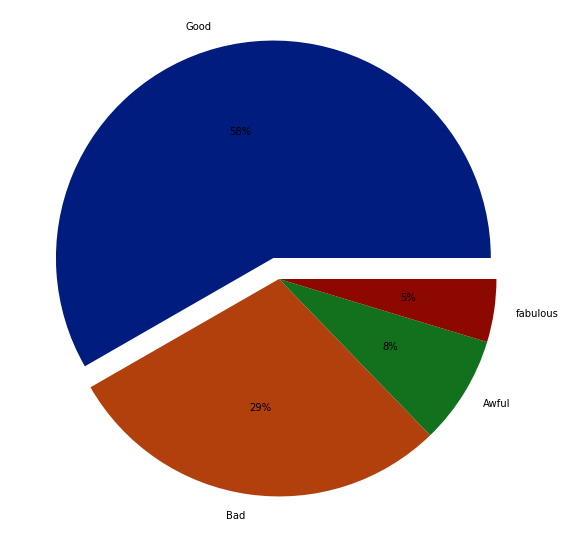

In [28]:
stress_level = list(df['Stress Level '].value_counts().keys())
count_stress_level = list(df['Stress Level '].value_counts().values)
plt.figure(figsize=(20,10))
explode = [0.1, 0, 0, 0]
palette_color = sns.color_palette('dark')
plt.pie(count_stress_level, labels=stress_level, colors=palette_color,
        explode=explode, autopct='%.0f%%')

In [29]:
df["Financial Status"].value_counts()

good        129
Bad          88
Awful        14
Fabulous      4
Name: Financial Status, dtype: int64

([<matplotlib.patches.Wedge at 0x15b0e44c0>,
 [Text(-0.1837592167467439, 1.1858467650841837, 'good'),
  Text(-0.09546424902934905, -1.0958497055514786, 'Bad'),
  Text(1.0527677193148337, -0.3188732180171984, 'Awful'),
  Text(1.0984276801579935, -0.05879312428106705, 'Fabulous')],
 [Text(-0.1071928764356006, 0.6917439462991072, '55%'),
  Text(-0.05207140856146311, -0.5977362030280792, '37%'),
  Text(0.574236937808091, -0.17393084619119914, '6%'),
  Text(0.5991423709952691, -0.03206897688058202, '2%')])

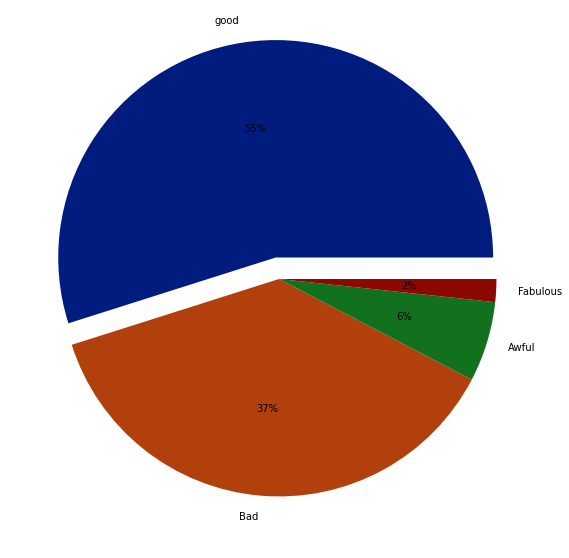

In [31]:
f_status = list(df['Financial Status'].value_counts().keys())
f_status_count = list(df['Financial Status'].value_counts().values)
plt.figure(figsize=(20,10))
explode = [0.1, 0, 0, 0]
palette_color = sns.color_palette('dark')
plt.pie(f_status_count, labels=f_status, colors=palette_color,
        explode=explode, autopct='%.0f%%')

/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


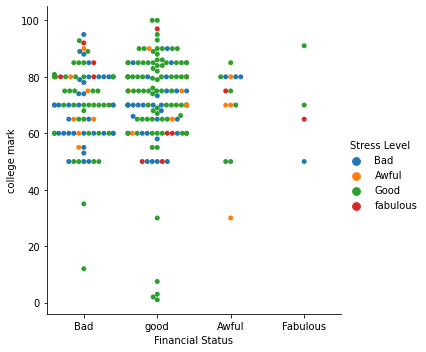

In [32]:
sns.catplot(x="Financial Status", y="college mark", hue="Stress Level ", kind="swarm", data=df)

In [33]:
df["Gender"].value_counts()

Male      156
Female     79
Name: Gender, dtype: int64

In [34]:
df[(df['Gender'] == 'Female') & (df['Stress Level '] == 'Bad') | (df['Stress Level '] == 'Awful')].shape[0]

42

In [35]:
df[(df['Gender'] == 'Male') & (df['Stress Level '] == 'Bad') | (df['Stress Level '] == 'Awful')].shape[0]

64

In [36]:
print('% of Female student in stress: ', (42/79)*100)
print('% of Male student in stress: ', (64/156)*100)

% of Female student in stress:  53.16455696202531
% of Male student in stress:  41.02564102564102


<AxesSubplot:xlabel='rating(daily studing time)', ylabel='college mark'>

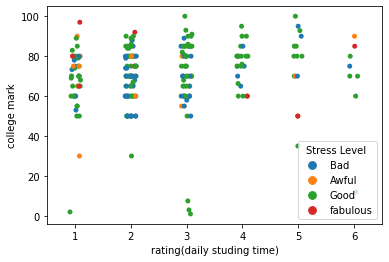

In [37]:
sns.stripplot(x="rating(daily studing time)", y="college mark", hue="Stress Level ", data=df)

In [38]:
corr_matrix = df.corr('pearson')
corr_matrix.style.background_gradient(cmap='coolwarm')

,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,salary expectation,rating(career based on degree),rating(daily studing time),rating(SM & VG time),rating(Travelling Time)
Height(CM),1.000000,0.275948,0.019896,-0.120672,-0.018535,-0.010708,-0.050653,0.074065,-0.083165,0.136579
Weight(KG),0.275948,1.000000,0.062394,-0.019208,-0.014901,-0.087787,0.015577,-0.081789,0.113478,0.056285
10th Mark,0.019896,0.062394,1.000000,0.473618,0.466234,-0.055694,0.087066,0.062460,0.060142,0.034265
12th Mark,-0.120672,-0.019208,0.473618,1.000000,0.425123,-0.085610,0.093375,0.105702,0.073176,-0.016152
college mark,-0.018535,-0.014901,0.466234,0.425123,1.000000,-0.103034,0.203160,0.095229,0.021712,-0.036986
salary expectation,-0.010708,-0.087787,-0.055694,-0.085610,-0.103034,1.000000,-0.029725,0.071313,-0.002170,-0.081795
rating(career based on degree),-0.050653,0.015577,0.087066,0.093375,0.203160,-0.029725,1.000000,0.246110,-0.078180,0.035946
rating(daily studing time),0.074065,-0.081789,0.062460,0.105702,0.095229,0.071313,0.246110,1.000000,-0.000422,0.066883
rating(SM & VG time),-0.083165,0.113478,0.060142,0.073176,0.021712,-0.002170,-0.078180,-0.000422,1.000000,-0.012589
rating(Travelling Time),0.136579,0.056285,0.034265,-0.016152,-0.036986,-0.081795,0.035946,0.066883,-0.012589,1.000000


In [ ]:
df["salary expectation"]